<a href="https://colab.research.google.com/github/johyunkang/ADP_certificate_preperation/blob/main/ADP_practical_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADP 실기 23회

## 기계학습 (50점)

### 1번

온,습도,조도,CO2농도에 따른 객실의 사용유무 판별


종속변수 Occupancy, 0: 비어있음 , 1: 사용중


데이터 출처 : https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+


data Url : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p1/problem1.csv

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/p1/problem1.csv')
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.40,0.004773,1
1,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.75,0.004744,1
2,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.00,0.004767,1
3,2015-02-02 14:23:59,23.7600,26.260,568.666667,790.00,0.004779,1
4,2015-02-02 14:25:59,23.7540,26.290,509.000000,797.00,0.004783,1


#### 1-1 번

 데이터 EDA 수행 후, 분석가 입장에서 의미있는 탐색

In [2]:
import pandas as pd

print(df.info())
print('''
결측치가 일부 존재하며 데이터 타입은 date 컬럼을 제외하고 모두 float형식이다
''')

# print(df.isnull().sum())
display(df.isnull().sum()) 
# Q. 위 print 와 display 의 차이는 뭐지?
# DF를 출력해보면 print는 단순 글자처럼 나오고, display 는 표처럼 나옴
print()
print(df[df.CO2.isnull()].date.values)
print('\n결측치는 CO2 컬럼에만 존재한다. 결측치의 데이터는 연속적으로 존재하는 것이 아니다.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17910 entries, 0 to 17909
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           17910 non-null  object 
 1   Temperature    17910 non-null  float64
 2   Humidity       17910 non-null  float64
 3   Light          17910 non-null  float64
 4   CO2            17889 non-null  float64
 5   HumidityRatio  17910 non-null  float64
 6   Occupancy      17910 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 979.6+ KB
None

결측치가 일부 존재하며 데이터 타입은 date 컬럼을 제외하고 모두 float형식이다



date              0
Temperature       0
Humidity          0
Light             0
CO2              21
HumidityRatio     0
Occupancy         0
dtype: int64


['2015-02-03 19:09:59' '2015-02-03 19:31:00' '2015-02-04 18:08:00'
 '2015-02-05 06:08:00' '2015-02-05 16:09:59' '2015-02-08 08:06:00'
 '2015-02-08 11:54:00' '2015-02-08 20:58:59' '2015-02-09 06:04:59'
 '2015-02-09 07:31:00' '2015-02-09 07:49:00' '2015-02-10 07:53:59'
 '2015-02-12 00:34:00' '2015-02-12 10:53:00' '2015-02-12 15:04:00'
 '2015-02-12 20:38:00' '2015-02-13 22:53:59' '2015-02-15 16:41:59'
 '2015-02-16 00:53:59' '2015-02-17 01:56:00' '2015-02-18 06:20:00']

결측치는 CO2 컬럼에만 존재한다. 결측치의 데이터는 연속적으로 존재하는 것이 아니다.


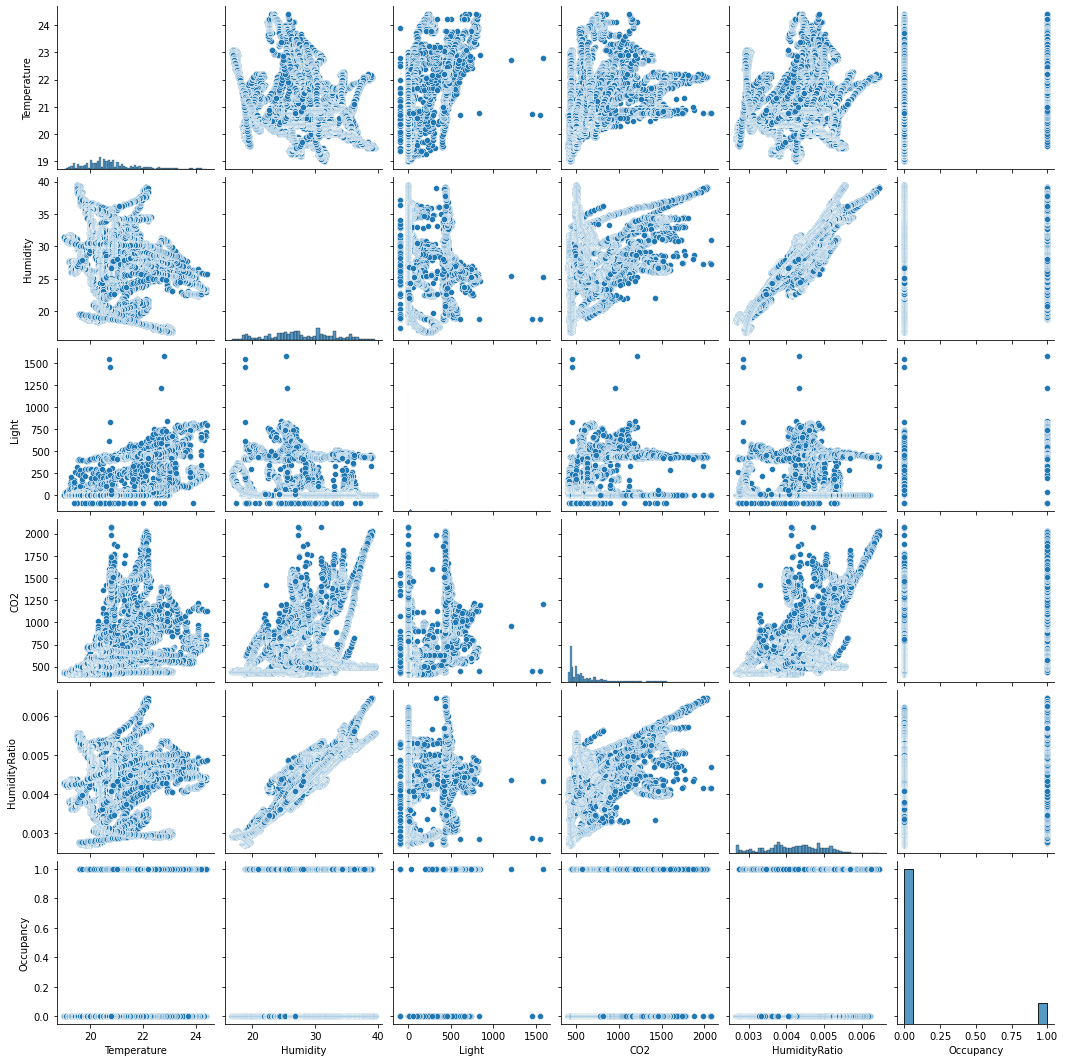

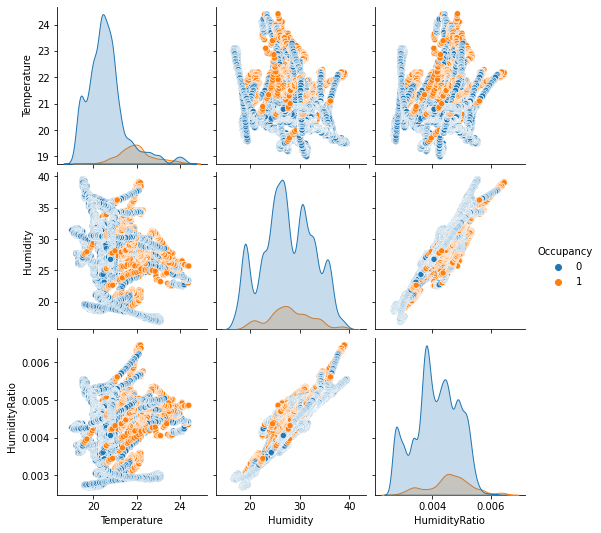

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

# hue 옵션을 이용해 특정 컬럼명을 입력하면 종류에 따른 색상 구분을 할 수 있음
# vars 옵션을 이용해 특정 컬럼만 나타나게 할 수 있음
sns.pairplot(df, hue='Occupancy', vars=['Temperature', 'Humidity', 'HumidityRatio']) 
plt.show()

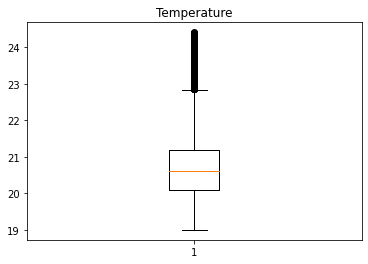

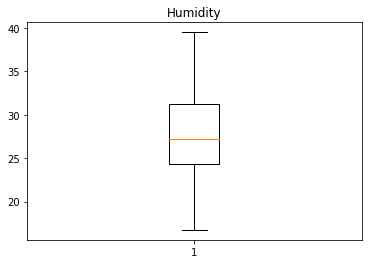

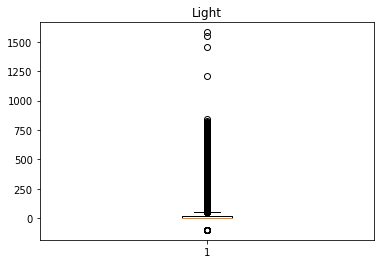

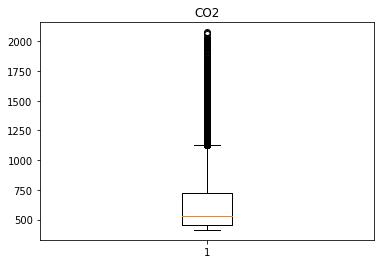

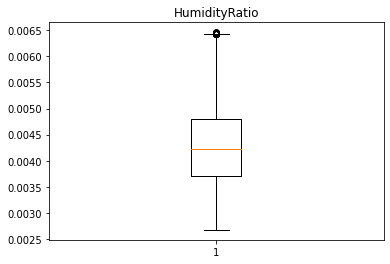


Humidity, humidityRatio 컬럼은 높은 상관관계를 보이며, 
두 컬럼을 제외한 나머지 데이터의 경우 이상치가 상대적으로 많이 존재한다.



In [4]:
for v in df.select_dtypes(include='float'):
    target = df[v].dropna()
    plt.boxplot(target)
    plt.title(v)
    plt.show()
    
print('''
Humidity, humidityRatio 컬럼은 높은 상관관계를 보이며, 
두 컬럼을 제외한 나머지 데이터의 경우 이상치가 상대적으로 많이 존재한다.
''')

In [5]:
display(df[df.Light < 0].shape)
display(df[df.Light == -99].shape)
display(df.describe())
print('''
Light 컬럼의 경우 -99 인 값이 50개 존재한다.
''')

(50, 7)

(50, 7)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,17910.000000,17910.000000,17910.000000,17889.000000,17910.000000,17910.000000
mean,20.749036,27.589163,78.157369,647.700865,0.004175,0.117253
std,0.994012,5.043595,168.574068,285.997340,0.000755,0.321730
min,19.000000,16.745000,-99.000000,412.750000,0.002674,0.000000
25%,20.100000,24.390000,0.000000,453.000000,0.003702,0.000000
50%,20.600000,27.200000,0.000000,532.666667,0.004222,0.000000
75%,21.200000,31.290000,22.000000,722.000000,0.004790,0.000000
max,24.408333,39.500000,1581.000000,2076.500000,0.006461,1.000000



Light 컬럼의 경우 -99 인 값이 50개 존재한다.



In [6]:
df['date'] = pd.to_datetime(df['date'])
timedeltas = df['date'].diff().dt.seconds.dropna()
print(timedeltas.describe())
print()
print('''
75%의 데이터가 연속하는 데이터 사이에 61초 이내의 시간 차이를 가지고 있다.
연속된 데이터간의 최대 시간 차이는 25680초로 대략 7시간 차이가 존재한다.
시계열 데이터로 데이터를 해석할 경우 이 사이 시간들은 결측치로 볼 수 있다.
''')

print(25680 / 3600)

count    17909.000000
mean        71.357474
std        241.363584
min         59.000000
25%         60.000000
50%         60.000000
75%         61.000000
max      25680.000000
Name: date, dtype: float64


75%의 데이터가 연속하는 데이터 사이에 61초 이내의 시간 차이를 가지고 있다.
연속된 데이터간의 최대 시간 차이는 25680초로 대략 7시간 차이가 존재한다.
시계열 데이터로 데이터를 해석할 경우 이 사이 시간들은 결측치로 볼 수 있다.

7.133333333333334


#### 1-2번

결측치를 대체하는 방식 선택하고 근거제시, 대체 수행

In [7]:
print('''
CO2 컬럼에 nan 값으로 비어있는 데이터는 직전, 직후 데이터를 비교해서 Occupancy 값이 변화되지 않거나,
date 값이 3분 이내로 연속하는 데이터라고 한다면 직전 CO2값으로 대체한다.
위의 두 기준에 해당한다면 모든 CO2의 결측치를 대체 할 수 있고 
데이터의 품질을 손상 시키지 않는다고 판단 할 수 있다.
''')

for value in df[df['CO2'].isnull()].index :
    target = df.iloc[value-1 : value+2]
    difftime = target['date'].diff().dt.seconds.dropna()
    if target.Occupancy.nunique() == 1 and len(difftime[difftime > 180]) == 0 :
        df.loc[value, 'CO2'] = df.loc[value-1].CO2
        
display(df.isnull().sum())


CO2 컬럼에 nan 값으로 비어있는 데이터는 직전, 직후 데이터를 비교해서 Occupancy 값이 변화되지 않거나,
date 값이 3분 이내로 연속하는 데이터라고 한다면 직전 CO2값으로 대체한다.
위의 두 기준에 해당한다면 모든 CO2의 결측치를 대체 할 수 있고 
데이터의 품질을 손상 시키지 않는다고 판단 할 수 있다.



date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64